In [5]:
# Directory Path
import pathlib

NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "exercise-1" / "data"

In [96]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as ply
import shapely

# Read shapefile
train_map = gpd.read_file(DATA_DIRECTORY / "SydneyTrains.shp")

train_map.head()

,OBJECTID,shape_id,route_id,agency_id,route_shor,route_long,route_desc,route_type,route_url,route_colo,route_text,route_ty00,SHAPE_Leng,geometry
0,1,APS_1a,APS_1a,SydneyTrains,T8,City Circle to Macarthur via Airport,T8 Airport & South Line,Rail,None,00954C,FFFFFF,Rail,0.565990,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
1,2,APS_1b,None,None,None,None,None,None,None,None,None,None,0.518128,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
2,3,APS_1c,APS_1c,SydneyTrains,T8,City Circle to Macarthur via Sydenham,T8 Airport & South Line,Rail,None,00954C,FFFFFF,Rail,0.545102,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
3,4,APS_1d,None,None,None,None,None,None,None,None,None,None,0.545085,"LINESTRING (151.2074 -33.88374, 151.20769 -33...."
4,5,APS_1e,APS_1e,SydneyTrains,T8,City Circle to Leppington via Sydenham,T8 Airport & South Line,Rail,None,00954C,FFFFFF,Rail,0.497239,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."


In [97]:
train_map[train_map["route_shor"] == "CCN"]

,OBJECTID,shape_id,route_id,agency_id,route_shor,route_long,route_desc,route_type,route_url,route_colo,route_text,route_ty00,SHAPE_Leng,geometry
14,15,CCN_1a,CCN_1a,NSWTrains,CCN,Central to Newcastle Interchange via Strathfield,Central Coast & Newcastle Line,Rail,None,D11F2F,FFFFFF,Rail,1.612130,"LINESTRING (151.75906 -32.92405, 151.75759 -32..."
15,16,CCN_1b,CCN_1b,NSWTrains,CCN,Central to Newcastle Interchange via Gordon,Central Coast & Newcastle Line,Rail,None,D11F2F,FFFFFF,Rail,1.523746,"LINESTRING (151.75906 -32.92405, 151.75759 -32..."
16,17,CCN_1c,CCN_1c,NSWTrains,CCN,Central to Newcastle Interchange via Strathfield,Central Coast & Newcastle Line,Rail,None,D11F2F,FFFFFF,Rail,1.612130,"LINESTRING (151.75906 -32.92405, 151.75759 -32..."
17,18,CCN_2a,CCN_2a,NSWTrains,CCN,Newcastle Interchange to Central via Strathfield,Central Coast & Newcastle Line,Rail,None,D11F2F,FFFFFF,Rail,1.612130,"LINESTRING (151.75906 -32.92405, 151.75759 -32..."
18,19,CCN_2b,CCN_2b,NSWTrains,CCN,Newcastle Interchange to Central via Gordon,Central Coast & Newcastle Line,Rail,None,D11F2F,FFFFFF,Rail,1.523746,"LINESTRING (151.75906 -32.92405, 151.75759 -32..."


In [98]:
# Obtaining each network route description
train_map["route_shor"].unique()


array(['T8', None, 'BMT', 'CCN', 'T5', 'NRC', 'NRW', 'STH', 'WST', 'T4',
       'HUN', 'T2', 'T1', 'T9', 'T7', 'SCO', 'SHL', 'T3', 'T6'],
      dtype=object)

In [99]:
# Setting route colours
routeColor = []
for index, row in train_map.iterrows():
    if row["route_shor"] == None:
        color = "#000000"

    elif row["route_shor"] == "T1":
        color = "#f99d1c"

    elif row["route_shor"] == "T2":
        color = "#0098cf"

    elif row["route_shor"] == "T3":
        color = "#f36f21"

    elif row["route_shor"] == "T4":
        color = "#005ba6"

    elif row["route_shor"] == "T5":
        color = "#c52490"

    elif row["route_shor"] == "T6":
        color = "#7d3e22"

    elif row["route_shor"] == "T7":
        color = "#70828e"
    
    elif row["route_shor"] == "T8":
        color = "#00974c"

    elif row["route_shor"] == "T9":
        color = "#d42030"

    elif row["route_shor"] == "BMT":
        color = "#f0a501"

    elif row["route_shor"] == "CCN":
        color = "#c8012e"

    elif row["route_shor"] == "NRC":
        color = "#e96319"

    elif row["route_shor"] == "NRW":
        color = "#e96319"

    elif row["route_shor"] == "STH":
        color = "#e96319"

    elif row["route_shor"] == "WST":
        color = "#e96319"

    elif row["route_shor"] == "HUN":
        color = "#833134"

    elif row["route_shor"] == "SCO":
        color = "#2c4c98"

    elif row["route_shor"] == "SHL":
        color = "#00913a"
    
    routeColor.append(color)

In [101]:
train_map["route_colo"] = routeColor
train_map.head()

,OBJECTID,shape_id,route_id,agency_id,route_shor,route_long,route_desc,route_type,route_url,route_colo,route_text,route_ty00,SHAPE_Leng,geometry
0,1,APS_1a,APS_1a,SydneyTrains,T8,City Circle to Macarthur via Airport,T8 Airport & South Line,Rail,None,#00974c,FFFFFF,Rail,0.565990,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
1,2,APS_1b,None,None,None,None,None,None,None,#000000,None,None,0.518128,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
2,3,APS_1c,APS_1c,SydneyTrains,T8,City Circle to Macarthur via Sydenham,T8 Airport & South Line,Rail,None,#00974c,FFFFFF,Rail,0.545102,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."
3,4,APS_1d,None,None,None,None,None,None,None,#000000,None,None,0.545085,"LINESTRING (151.2074 -33.88374, 151.20769 -33...."
4,5,APS_1e,APS_1e,SydneyTrains,T8,City Circle to Leppington via Sydenham,T8 Airport & South Line,Rail,None,#00974c,FFFFFF,Rail,0.497239,"LINESTRING (151.20737 -33.88374, 151.20759 -33..."


In [145]:
from matplotlib.lines import Line2D

# Create legend elements


legend_elements = [Line2D([0],[0], marker = 's', color = "#f99d1c", 
                          label = "T1 - North Shore and Western Line",
                          markersize = 1)]

AttributeError: 'Axes' object has no attribute 'add_to'

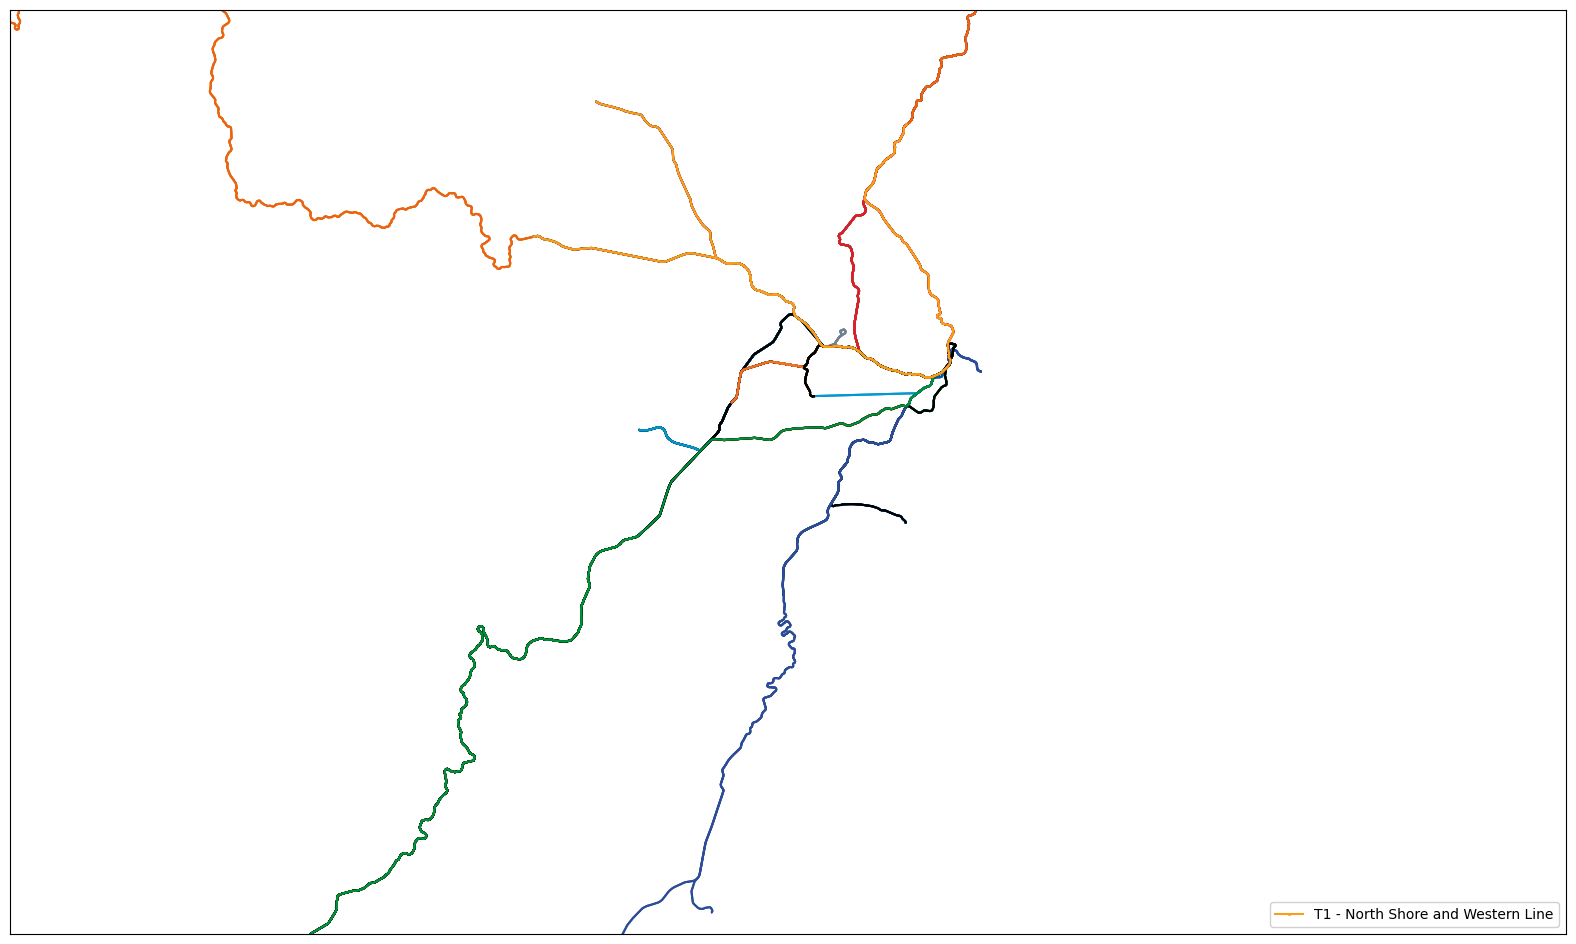

In [147]:
# Zoom data to Greater Sydney, assign color train map.
train_map = train_map.to_crs("EPSG:7844")

ax = train_map.plot(
    figsize = (24,12),
    color = train_map["route_colo"],
    legend = True,
    label = "Public Transport"

)
ax.set_xlim(150,152)
ax.set_ylim(-34.5,-33.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Add legend
ax.legend(handles = legend_elements, frameon = True, ncol = 1, framealpha = 0.9,
         bbox_to_anchor = (1,0), loc = "lower right")

# Add interactive basemap
import contextily
contextily.add_basemap(ax, source = contextily.providers.CartoDB.Positron, crs = "EPSG:7844")

